In [2]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid")
import pyramid


# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'pyramid_50ep_512_sG_wo_slice'
INPUT_SHAPE = (512, 512, 1)
RESIZE_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-15 07:15:19.859459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 07:15:19.859488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 07:15:19.860365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 07:15:19.865280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 07:15:20.481325: W tensorflow/compiler/tf2

In [5]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE, 
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = pyramid.build_model(INPUT_SHAPE)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 512, 512, 16)         32        ['input_2[0][0]']             
                                                                                                  
 conv2d_37 (Conv2D)          (None, 512, 512, 8)          16        ['input_2[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)          (None, 512, 512, 16)         160       ['input_2[0][0]']             
                                                                                            

In [ ]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)

In [2]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/pyramid_50ep_512_sG_wo_slice.tf'
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)
test_generator = data_generator.SlicedDataGenerator(
    TEST_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


2024-02-15 06:47:36.258105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 06:47:36.292148: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 06:47:36.292380: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

L344-L355
2024-02-15 06:47:36.357147: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9891 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:43:00.0, compute capability: 8.6
2024-02-15 06:47:39.830169: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


233/233 [==============================] - 20s 70ms/step - loss: 0.3375 - sensitivity: 0.6074 - specificity: 0.9747 - accuracy: 0.9493 - f1_score: 0.6108 - iou: 0.4472
2번째 epoch 결과


233/233 [==============================] - 16s 67ms/step - loss: 0.2870 - sensitivity: 0.7157 - specificity: 0.9704 - accuracy: 0.9528 - f1_score: 0.6669 - iou: 0.5091
3번째 epoch 결과


233/233 [==============================] - 17s 67ms/step - loss: 0.2730 - sensitivity: 0.7219 - specificity: 0.9732 - accuracy: 0.9559 - f1_score: 0.6823 - iou: 0.5272
4번째 epoch 결과


233/233 [==============================] - 16s 64ms/step - loss: 0.2823 - sensitivity: 0.6040 - specificity: 0.9873 - accuracy: 0.9607 - f1_score: 0.6644 - iou: 0.5068
5번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.2538 - sensitivity: 0.7653 - specificity: 0.9722 - accuracy: 0.9581 - f1_score: 0.7050 - iou: 0.5549
6번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.2480 - sensitivity: 0.7760 - specificity: 0.9723 - accuracy: 0.9589 - f1_score: 0.7119 - iou: 0.5636
7번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2447 - sensitivity: 0.7522 - specificity: 0.9763 - accuracy: 0.9608 - f1_score: 0.7142 - iou: 0.5661
8번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2348 - sensitivity: 0.7750 - specificity: 0.9758 - accuracy: 0.9619 - f1_score: 0.7262 - iou: 0.5812
9번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2309 - sensitivity: 0.7786 - specificity: 0.9761 - accuracy: 0.9625 - f1_score: 0.7300 - iou: 0.5860
10번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.2296 - sensitivity: 0.7185 - specificity: 0.9838 - accuracy: 0.9653 - f1_score: 0.7291 - iou: 0.5837
11번째 epoch 결과


233/233 [==============================] - 17s 72ms/step - loss: 0.2425 - sensitivity: 0.7075 - specificity: 0.9827 - accuracy: 0.9637 - f1_score: 0.7157 - iou: 0.5678
12번째 epoch 결과


233/233 [==============================] - 16s 64ms/step - loss: 0.2254 - sensitivity: 0.7897 - specificity: 0.9761 - accuracy: 0.9633 - f1_score: 0.7369 - iou: 0.5952
13번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.2238 - sensitivity: 0.7787 - specificity: 0.9777 - accuracy: 0.9640 - f1_score: 0.7379 - iou: 0.5964
14번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2186 - sensitivity: 0.7629 - specificity: 0.9809 - accuracy: 0.9658 - f1_score: 0.7431 - iou: 0.6027
15번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.2166 - sensitivity: 0.7826 - specificity: 0.9792 - accuracy: 0.9654 - f1_score: 0.7462 - iou: 0.6068
16번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2189 - sensitivity: 0.7917 - specificity: 0.9775 - accuracy: 0.9646 - f1_score: 0.7441 - iou: 0.6047
17번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.2152 - sensitivity: 0.7505 - specificity: 0.9830 - accuracy: 0.9669 - f1_score: 0.7458 - iou: 0.6060
18번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2211 - sensitivity: 0.8067 - specificity: 0.9751 - accuracy: 0.9636 - f1_score: 0.7428 - iou: 0.6032
19번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2149 - sensitivity: 0.7325 - specificity: 0.9853 - accuracy: 0.9677 - f1_score: 0.7455 - iou: 0.6056
20번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2135 - sensitivity: 0.7216 - specificity: 0.9865 - accuracy: 0.9679 - f1_score: 0.7451 - iou: 0.6039
21번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2117 - sensitivity: 0.7603 - specificity: 0.9827 - accuracy: 0.9673 - f1_score: 0.7507 - iou: 0.6128
22번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2114 - sensitivity: 0.7278 - specificity: 0.9862 - accuracy: 0.9682 - f1_score: 0.7477 - iou: 0.6079
23번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2125 - sensitivity: 0.8138 - specificity: 0.9764 - accuracy: 0.9652 - f1_score: 0.7523 - iou: 0.6159
24번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.2141 - sensitivity: 0.7266 - specificity: 0.9861 - accuracy: 0.9679 - f1_score: 0.7457 - iou: 0.6054
25번째 epoch 결과


233/233 [==============================] - 17s 67ms/step - loss: 0.2155 - sensitivity: 0.8267 - specificity: 0.9741 - accuracy: 0.9640 - f1_score: 0.7488 - iou: 0.6105
26번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.2091 - sensitivity: 0.7442 - specificity: 0.9850 - accuracy: 0.9683 - f1_score: 0.7522 - iou: 0.6141
27번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2053 - sensitivity: 0.7761 - specificity: 0.9823 - accuracy: 0.9680 - f1_score: 0.7583 - iou: 0.6229
28번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.2069 - sensitivity: 0.8035 - specificity: 0.9788 - accuracy: 0.9667 - f1_score: 0.7578 - iou: 0.6227
29번째 epoch 결과


233/233 [==============================] - 18s 72ms/step - loss: 0.2051 - sensitivity: 0.7741 - specificity: 0.9827 - accuracy: 0.9681 - f1_score: 0.7582 - iou: 0.6226
30번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.2023 - sensitivity: 0.7884 - specificity: 0.9815 - accuracy: 0.9681 - f1_score: 0.7616 - iou: 0.6273
31번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.2049 - sensitivity: 0.7900 - specificity: 0.9807 - accuracy: 0.9675 - f1_score: 0.7592 - iou: 0.6243
32번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2207 - sensitivity: 0.8116 - specificity: 0.9749 - accuracy: 0.9637 - f1_score: 0.7428 - iou: 0.6029
33번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2041 - sensitivity: 0.7943 - specificity: 0.9808 - accuracy: 0.9679 - f1_score: 0.7619 - iou: 0.6281
34번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.2026 - sensitivity: 0.7950 - specificity: 0.9806 - accuracy: 0.9678 - f1_score: 0.7620 - iou: 0.6280
35번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.2012 - sensitivity: 0.7605 - specificity: 0.9847 - accuracy: 0.9692 - f1_score: 0.7612 - iou: 0.6264
36번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2045 - sensitivity: 0.7933 - specificity: 0.9806 - accuracy: 0.9676 - f1_score: 0.7597 - iou: 0.6249
37번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2042 - sensitivity: 0.7996 - specificity: 0.9799 - accuracy: 0.9674 - f1_score: 0.7606 - iou: 0.6261
38번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.2032 - sensitivity: 0.7927 - specificity: 0.9811 - accuracy: 0.9680 - f1_score: 0.7621 - iou: 0.6282
39번째 epoch 결과


233/233 [==============================] - 17s 67ms/step - loss: 0.2003 - sensitivity: 0.7867 - specificity: 0.9821 - accuracy: 0.9686 - f1_score: 0.7644 - iou: 0.6311
40번째 epoch 결과


233/233 [==============================] - 17s 69ms/step - loss: 0.1995 - sensitivity: 0.7514 - specificity: 0.9860 - accuracy: 0.9698 - f1_score: 0.7626 - iou: 0.6280
41번째 epoch 결과


233/233 [==============================] - 16s 67ms/step - loss: 0.2044 - sensitivity: 0.8076 - specificity: 0.9791 - accuracy: 0.9672 - f1_score: 0.7612 - iou: 0.6266
42번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2022 - sensitivity: 0.8102 - specificity: 0.9792 - accuracy: 0.9676 - f1_score: 0.7639 - iou: 0.6305
43번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.1987 - sensitivity: 0.7651 - specificity: 0.9847 - accuracy: 0.9695 - f1_score: 0.7643 - iou: 0.6305
44번째 epoch 결과


233/233 [==============================] - 17s 68ms/step - loss: 0.1988 - sensitivity: 0.8013 - specificity: 0.9808 - accuracy: 0.9684 - f1_score: 0.7665 - iou: 0.6340
45번째 epoch 결과


233/233 [==============================] - 17s 70ms/step - loss: 0.2028 - sensitivity: 0.7579 - specificity: 0.9848 - accuracy: 0.9692 - f1_score: 0.7605 - iou: 0.6254
46번째 epoch 결과


233/233 [==============================] - 16s 64ms/step - loss: 0.1989 - sensitivity: 0.7747 - specificity: 0.9836 - accuracy: 0.9692 - f1_score: 0.7650 - iou: 0.6316
47번째 epoch 결과


233/233 [==============================] - 17s 71ms/step - loss: 0.1983 - sensitivity: 0.7962 - specificity: 0.9815 - accuracy: 0.9687 - f1_score: 0.7666 - iou: 0.6341
48번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.1984 - sensitivity: 0.7786 - specificity: 0.9835 - accuracy: 0.9693 - f1_score: 0.7663 - iou: 0.6335
49번째 epoch 결과


233/233 [==============================] - 16s 65ms/step - loss: 0.2005 - sensitivity: 0.7765 - specificity: 0.9834 - accuracy: 0.9692 - f1_score: 0.7650 - iou: 0.6319
50번째 epoch 결과


233/233 [==============================] - 16s 66ms/step - loss: 0.2076 - sensitivity: 0.8278 - specificity: 0.9760 - accuracy: 0.9659 - f1_score: 0.7590 - iou: 0.6244


In [6]:
import pickle
# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'pyramid_50ep_512_sG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [7]:
file_path = 'pyramid_50ep_512_sG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

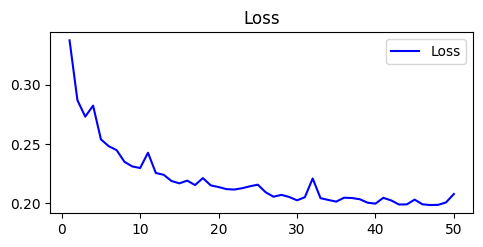

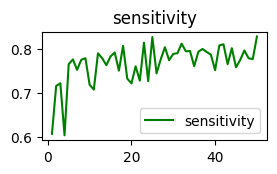

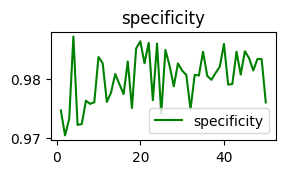

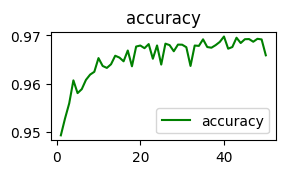

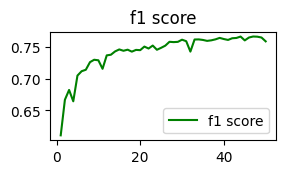

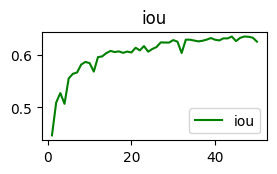

<Figure size 640x480 with 0 Axes>

In [8]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)